# i Perkenalan

- Nama = Muhammad Farhan Hendriyanto
- Batch = HCK-027

- Tujuan = Membuat model yang mampu melakukan klasifikasi peforma agen berdasarkan rating. Matriks yang digunakan adalah MAE, RMSE, dan R2 tujuannya adalah mengukur bagaimana performance dari model yang sudah dibuat.


latar belakang:

Ekosistem layanan pengiriman cepat di India berkembang pesat dengan persaingan yang ketat di antara berbagai perusahaan seperti Blinkit, Zepto, Swiggy Instamart, dan JioMart. Mereka menawarkan pengiriman bahan makanan dan makanan dalam waktu sangat singkat, mulai dari 10 hingga 30 menit, dengan dukungan jaringan logistik yang luas, rantai pasok berbasis teknologi, serta pemanfaatan analisis data pelanggan yang mendalam (Bain & Company, 2025; Expert Market Research, 2024). Dalam dunia e-commerce, kepuasan pelanggan merupakan salah satu tolak ukur yang dapat dijadikan sebagai acuan seberapa baik customer service yang sudah kita lakukan. Hal ini tentunya juga dapat memberikan pengaruh terhadap loyalitas pelanggan yang nantinya akan semakin meningkat apabila kita dapat memberikan service yang baik terhadap customer. Kepuasan pelanggan ini dapat dilihat dari beberapa aspek seperti rating, review, feedback, dan lain sebagainya. Berdasarkan analisis yang dilakukan oleh author sebelumnya ditemukan bahwa review dan rating pelanggan memberikan data yang penting dan dapat ditindaklanjuti untuk meningkatkan kinerja agen pengiriman dan kepuasan pelanggan. Oleh karena itu, proyek ini bertujuan untuk membangun sistem prediksi klasifikasi performance agen delivery berdasarkan rating yang diberikan oleh pelanggan. Hasilnya nanti diharapkan dapat berguna seperti berikut:

- Memberikan insight tentang bagaimana kualitas layanan yang telah kita berikan (seperti apa dampaknya kepada customer),
- Mengidentifikasi dan mengevaluasi agen yang peformanya kurang baik.
- Membantu perusahaan menyusun strategi peningkatan layanan yang sesuai (misalnya terdapat agen" yang layanannya kurang memuaskan, kayk paling sering akurasi pengirimannya kurang bagus, nanti kita bisa Menyusun strategi buat ningkatin layanan: nambahin kurir, perbanyak diskon, dsbg).

Justifikasi masalah:

https://dinastirev.org/JMPIS/article/view/265,
https://www.kompas.com/parapuan/read/533965567/mengenal-apa-itu-kepuasan-pelanggan-dan-pentingnya-dalam-bisnis,
https://www.telkomsel.com/enterprise/insight/blog/pentingnya-customer-satisfaction-dalam-bisnis#:~:text=Dalam%20bisnis%2C%20kepuasan%20pelanggan%20adalah,menyebarkan%20reputasi%20bisnis%20secara%20organik.,

User: Tim manajemen operasional

Problem statement: 

Peforma agen memiliki peran terhadap kepuasan pelanggan. Akan tetapi, masih belum ada sistem yang secara otomatis mengklasifikasikan peforma agen berdasarkan rating. Akibatnya sistem penilaian peforma agen masih dilakukan secara manual. Oleh karena itu, project ini bertujuan untuk membantu dalam mapping peforma agen (low, medium, high). Tujuannya adalah agar bisa mengidentifikasi agen yang peformanya masih kurang optimal dan menyusun strategi peningkatan layanan yang tepat sasaran.


# ii. Import library

In [ ]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kendalltau, f_oneway, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error, root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import pickle

Di sini saya melakukan import library yang dibutuhkan

In [3]:
# additional setting
pd.set_option('display.min_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

`link:

https://www.kaggle.com/datasets/kanakbaghel/indias-fast-delivery-agents-reviews-and-ratings

Penjelasan singkat tentang kolom yang ada pada dataset:

- Agent Name : Nama agen atau perusahaan yang memberikan layanan pengiriman.

- Rating : Nilai kepuasan pelanggan terhadap layanan (dalam skala 0–5).

- Review Text : Ulasan atau komentar pelanggan dalam bentuk teks.

- Delivery Time (min) : Lama waktu pengiriman dalam satuan menit.

- Location : Lokasi/kota tempat pelanggan berada.

- Order Type : Jenis pesanan seperti kebutuhan sehari-hari, bahan makanan, obat, dll.

- Customer Feedback Type : Kategori umpan balik pelanggan, bisa positif, netral, atau negatif.

- Price Range : Rentang harga produk dalam pesanan (misal: rendah, sedang, tinggi).

- Discount Applied : Apakah pesanan mendapatkan diskon atau tidak (Yes/No).

- Product Availability : Status ketersediaan produk saat dipesan (In Stock/Out of Stock).

- Customer Service Rating : Penilaian pelanggan terhadap layanan customer service (angka 1–5).

- Order Accuracy : Apakah pesanan sesuai dengan yang diminta (Correct/Incorrect).









# iii. Data Loading

In [4]:
# Melakukan loading data
Dataset = pd.read_csv("D:\Hacktiv8\Phase 1\Milestone 1\p1-ftds027-hck-m2-MFarhanH\Fast Delivery Agent Reviews.csv")
df = Dataset.copy()
df.head() 

,Agent Name,Rating,Review Text,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job yard.,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school way issue grow action figure one.,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen lose hour hour.,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyond Democrat beautiful very.,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone effect fact hospital dream party.,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect


## Data Preprocessing

### Data Characteristics

In [5]:
df.shape

(5000, 12)

Di sini bisa dilihat bahwa data memiliki 5000 baris dengan 12 kolom.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agent Name               5000 non-null   object 
 1   Rating                   5000 non-null   float64
 2   Review Text              5000 non-null   object 
 3   Delivery Time (min)      5000 non-null   int64  
 4   Location                 5000 non-null   object 
 5   Order Type               5000 non-null   object 
 6   Customer Feedback Type   5000 non-null   object 
 7   Price Range              5000 non-null   object 
 8   Discount Applied         5000 non-null   object 
 9   Product Availability     5000 non-null   object 
 10  Customer Service Rating  5000 non-null   int64  
 11  Order Accuracy           5000 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 468.9+ KB


Di sini bisa dilihat bahwa data memiliki tipe data yang beragam seperti berikut:
- Data memiliki 3 kolom yang bertipe numerik
- Data memiliki 9 kolom yang bertipe kategorik

In [7]:
# melihat summary statistik deskriptif data numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,5000.0,3.0029,1.152140,1.0,2.0,3.0,4.0,5.0
Delivery Time (min),5000.0,34.9624,14.789656,10.0,22.0,35.0,48.0,60.0
Customer Service Rating,5000.0,2.9720,1.409969,1.0,2.0,3.0,4.0,5.0


Berdasarkan data tersebut, dapat dilihat bahwa nilai mean dan median pada data hampir sama, ini berarti data memiliki distribusi data yang bisa dibilang mendekati distribusi normal. Lebih detailnya akan dicek pada bagian outlier.

### Data Cleaning

#### Missing Value Check

In [8]:
# Cek missing value
df.isna().sum()

Agent Name                 0
Rating                     0
Review Text                0
Delivery Time (min)        0
Location                   0
Order Type                 0
Customer Feedback Type     0
Price Range                0
Discount Applied           0
Product Availability       0
Customer Service Rating    0
Order Accuracy             0
dtype: int64

Dari sini bisa dilihat bahwa data memiliki non missing value (tidak ada nilai yang kosong).

#### Duplicated Data

In [9]:
# cek duplikasi yang ada ada data
df.duplicated().sum()

0

Setelah dilakukan pengecekan, bisa dilihat bahwa data tidak memiliki nilai duplikat pada setiap barisnya.

In [10]:
df.head(3)

,Agent Name,Rating,Review Text,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job yard.,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school way issue grow action figure one.,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen lose hour hour.,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct


# iv. EDA

## 1. Bagaimana distribusi data numeriknya?

In [11]:
# lihat analisis statistik deskriptif

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,5000.0,3.0029,1.152140,1.0,2.0,3.0,4.0,5.0
Delivery Time (min),5000.0,34.9624,14.789656,10.0,22.0,35.0,48.0,60.0
Customer Service Rating,5000.0,2.9720,1.409969,1.0,2.0,3.0,4.0,5.0


Berdasarkan data tersebut, dapat dilihat bahwa nilai mean dan median pada data hampir sama, ini berarti data memiliki distribusi data yang bisa dibilang mendekati distribusi normal. Lebih detailnya akan dicek pada bagian outlier.

In [12]:
# buat function untuk memudahkan pembuatan chart
'''  
Function ini bertujuan untuk membuat histogram untuk merepresentasikan distribusi data.
'''
def create_data_distribution(df, variable):
    # Define figure size
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[variable])
    plt.title(f'Distribusi {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('Frekuensi')
    plt.show()

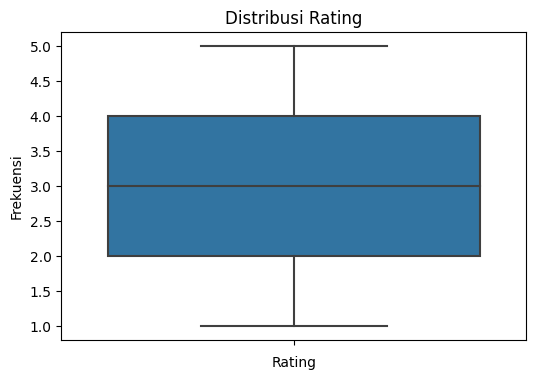

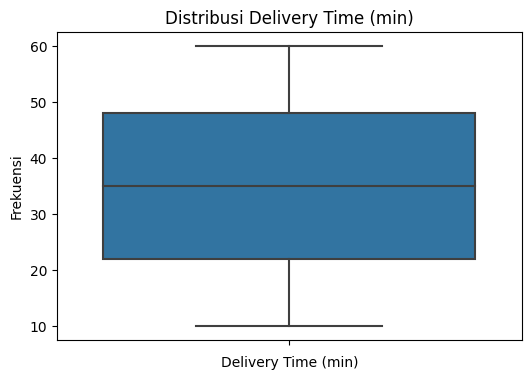

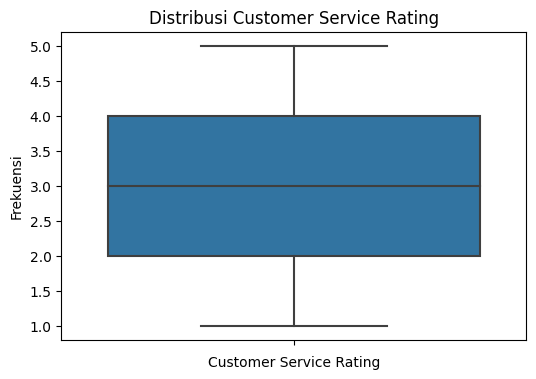

In [13]:
list_numerik = ['Rating', 'Delivery Time (min)', 'Customer Service Rating']
for i in list_numerik:
    create_data_distribution(df, i)

Berdasarkan hasil visualisasi, bisa dilihat bahwa semua data numeriknya tidak ditemukan outlier, sehingga bisa dikatakan jika data terdistribusi normal.

In [14]:
#cek distribusi
listItem= []

for col in list_numerik:
  listItem.append([col, round(df[col].skew(),1), np.where(
    (round(df[col].skew(),1) <= 0.5) & (round(df[col].skew(),1) >= -0.5),
    'normal','skewed')])


skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,Rating,-0.0,normal
1,Delivery Time (min),0.0,normal
2,Customer Service Rating,0.0,normal


Berdasarkan hasil pengecekan skewness, ditemukan bahwa datanya memiliki nilai skewness 0 atau sangat mendektai nol yang dimana bisa dikatakn bahwa data terdistribusi normal. Ini sesuai juga dari hasil summary of statistic description dan visualiasasi box plot yang menyatakan bahwa data terdistribusi normal.

## 2. Siapa agen yang paling banyak melakukan pengantaran?

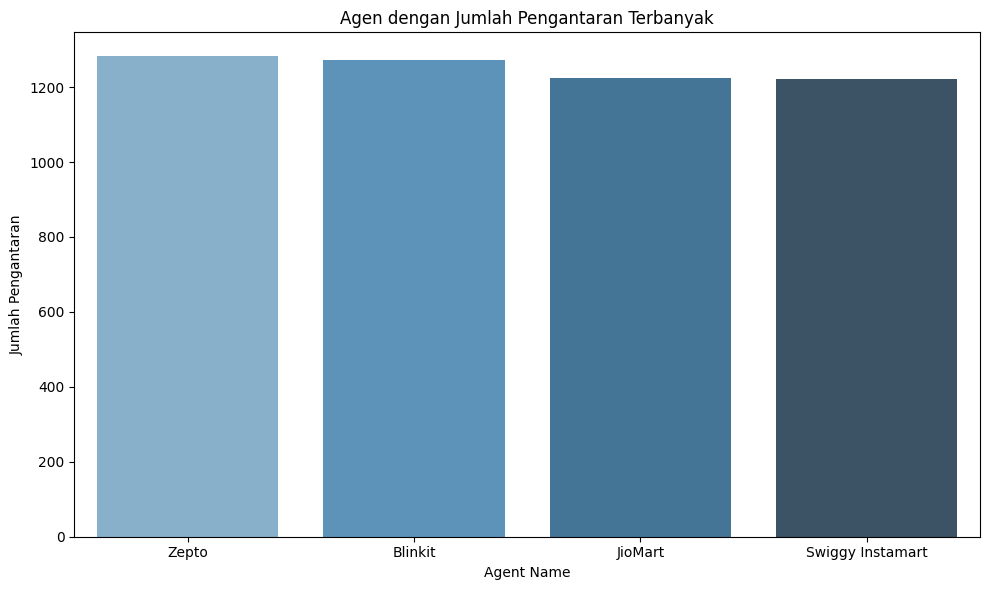

In [15]:
# Menghitung jumlah pengantaran per agen
agent_counts = df['Agent Name'].value_counts().reset_index()
agent_counts.columns = ['Agent Name', 'Jumlah Pengantaran']

# Plot barplot top 10 agen dengan pengantaran terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(data=agent_counts, x='Agent Name', y='Jumlah Pengantaran', palette='Blues_d')
plt.title('Agen dengan Jumlah Pengantaran Terbanyak')
plt.xlabel('Agent Name')
plt.ylabel('Jumlah Pengantaran')
plt.tight_layout()
plt.show()

Berdasaran visualisasi di atas, bisa dilihat bahwa Zepto merupakan agen dengan jumlah pengantaran terbanyak, sedangkan Swiggy Instamart merupakan agent dengan pengantaran terendah.

## 3. Apakah terdapat perbedaan rata-rata rating pelanggan berdasarkan jenis Order Type?

In [16]:
# Memisahkan Rating berdasarkan masing-masing Order Type
grouped = [group['Rating'].values for name, group in df.groupby('Order Type')]

# Melakukan uji ANOVA
anova_result = f_oneway(*grouped)
print('Statistik F:', anova_result.statistic)
print('P-value:', anova_result.pvalue)

Statistik F: 0.7894249441925045
P-value: 0.5318496770451202


Untuk menjawab pertanyaan ini, dilakukan uji annova dengan hipotesis sebagai berikut:

H0 : Rata-rata Rating sama untuk semua Order Type.

H1 : Setidaknya ada satu Order Type yang memiliki rata-rata Rating yang berbeda.

Berdasarkan hasil uji Annova, didapatkan bahwa tidak terdapat perbedaan signifikan pada rata-rata rating antar order type. Hal ini dikarenakan nilai p-value yang > 0.05 yang berarti tidak terdapatnya cukup bukti untuk menolak H0. Ini berarti rata-rata rating hampir sama di semua order type. Kemudian, dapat dikatakan juga bahwa order type bukan faktor signifikan yang memengaruhi rating.

## 4. Siapa agen yang memiliki rating terbaik? 

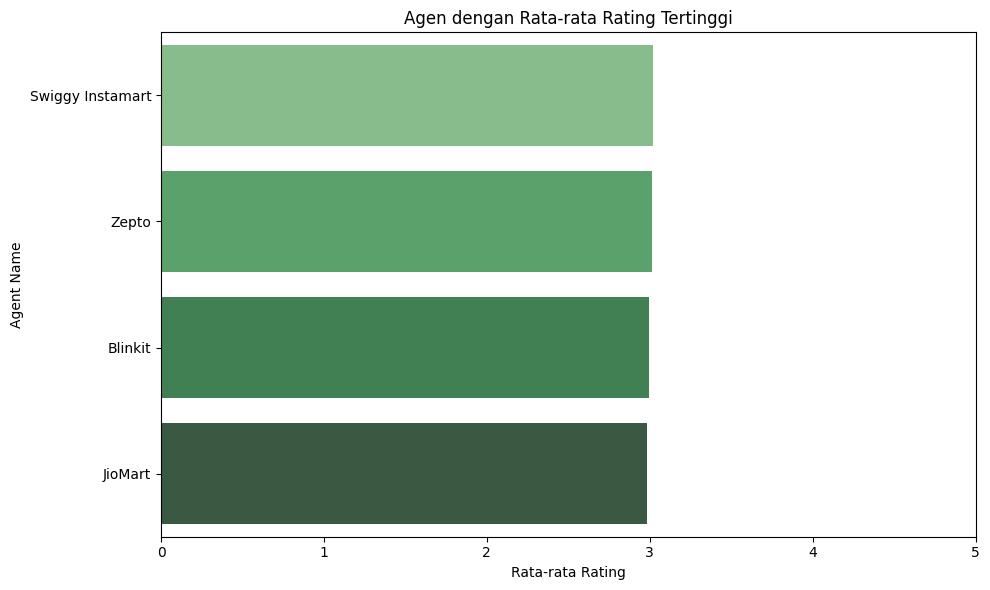

In [17]:
# Menghitung rata-rata rating tiap agen
avg_rating = df.groupby('Agent Name')['Rating'].mean().reset_index()

# Mengurutkan dari rating tertinggi ke terendah
top_agents = avg_rating.sort_values(by='Rating', ascending=False)

# Visualisasikan agen berdasarkan ratingnya
plt.figure(figsize=(10, 6))
sns.barplot(data=top_agents, x='Rating', y='Agent Name', palette='Greens_d')
plt.title('Agen dengan Rata-rata Rating Tertinggi')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Agent Name')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

Berdasarkan data hasil dari visualisasi di atas, ditemukan bahwa agen yang memiliki rating terbaik adalah Swiggy instamart, sedangkan agen dengan rating terendah adalah Jio Mart.

## 5. Lokasi mana yang memiliki rata-rata delivery time terlama?

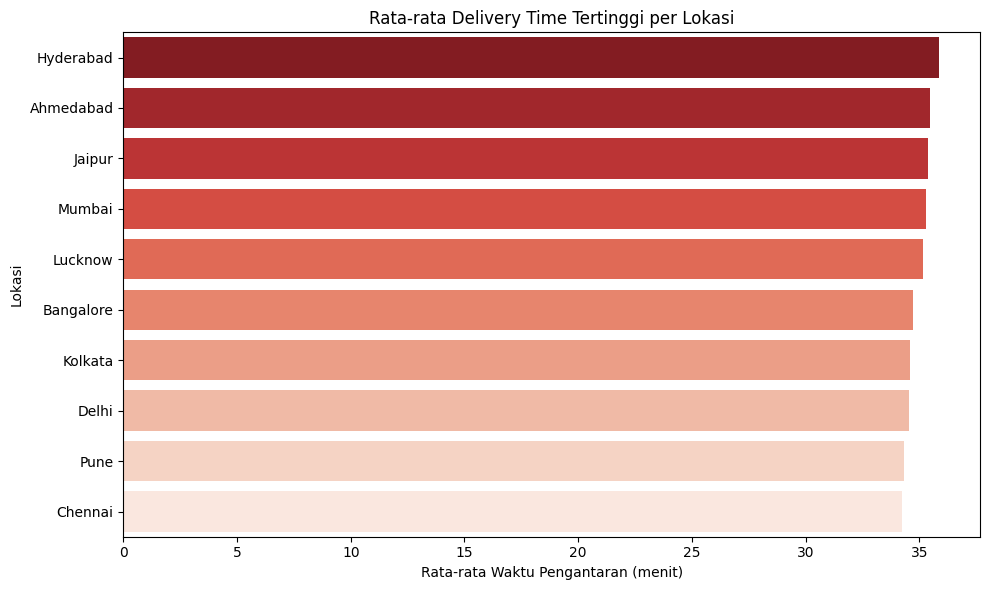

In [18]:
# Hitung rata-rata delivery time per lokasi
avg_delivery_by_location = df.groupby('Location')['Delivery Time (min)'].mean().reset_index()

# Urutkan dari yang paling lama ke paling cepat
avg_delivery_by_location = avg_delivery_by_location.sort_values(by='Delivery Time (min)', ascending=False)

# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_delivery_by_location, x='Delivery Time (min)', y='Location', palette='Reds_r')
plt.title('Rata-rata Delivery Time Tertinggi per Lokasi')
plt.xlabel('Rata-rata Waktu Pengantaran (menit)')
plt.ylabel('Lokasi')
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi di atas, dapat dilihat bahwa hyderabad merupakan lokasi yang rata-rata waktu pengantarannya terlama, yaitu > 35 mnt. Chennai merupakan lokasi yang rata-rata waktu pengirimannya terendah.

In [19]:
df.columns

Index(['Agent Name', 'Rating', 'Review Text', 'Delivery Time (min)',
       'Location', 'Order Type', 'Customer Feedback Type', 'Price Range',
       'Discount Applied', 'Product Availability', 'Customer Service Rating',
       'Order Accuracy'],
      dtype='object')

## 6. Apakah ada hubungan antara Customer Service Rating dengan Delivery Time?

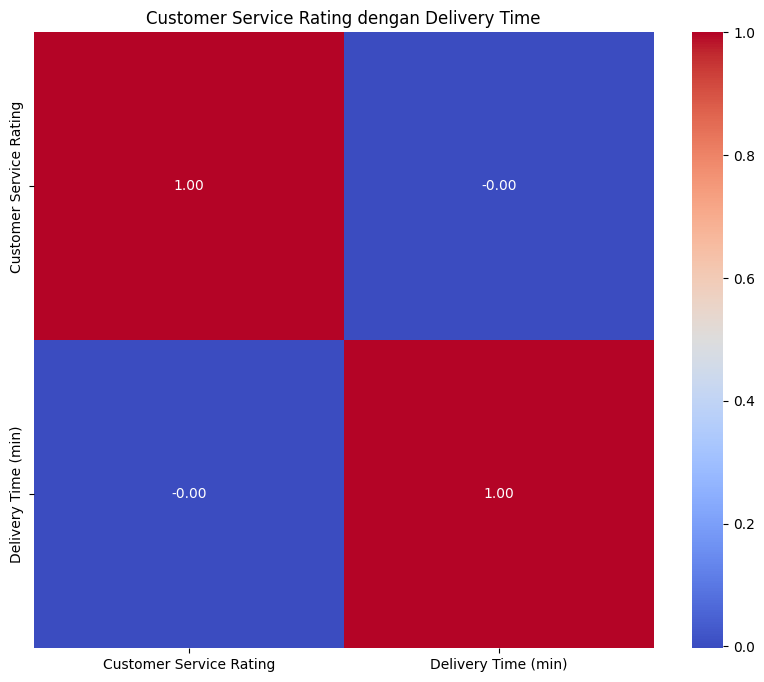

In [20]:
# cek korelasi fitur numerik

corr_matrix = df[['Customer Service Rating','Delivery Time (min)']].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Customer Service Rating dengan Delivery Time")
plt.show()

Di sini saya menggunakan uji korelasi spearman karena data yang ingin diuji keduanya adalah data numerik. Berdasarkan hasil visualiasi tersebut, dapat dilihat bahwa customer service rating bisa dikatan hampir tidak memiliki korelasi sama sekali, -0.00 menandakan bahwa korelasinya adalah negatif, namun sangat kecil.

## 7. Apakah terdapat perbedaan rata-rata waktu pengantaran (Delivery Time) di antara lokasi yang berbeda?

In [21]:
# Memisahkan Delivery Time berdasarkan masing-masing lokasi
grouped = [group['Delivery Time (min)'].values for name, group in df.groupby('Location')]

# Melakukan uji ANOVA
anova_result = f_oneway(*grouped)
print('Statistik F:', anova_result.statistic)
print('P-value:', anova_result.pvalue)

Statistik F: 0.6737676071232
P-value: 0.7334482695256543


Untuk menjawab pertanyaan ini, dilakukan uji annova dengan hipotesis sebagai berikut:

H0 : Rata-rata waktu pengantaran  sama untuk semua lokasi.

H1 : Setidaknya ada satu lokasi yang memiliki rata-rata waktu pengantaran yang berbeda.

Berdasarkan hasil uji Annova, didapatkan bahwa tidak terdapat perbedaan signifikan pada rata-rata waktu pengantaran (Delivery Time) antar lokasi. Hal ini dikarenakan nilai p-value yang > 0.05 yang berarti tidak terdapatnya cukup bukti untuk menolak H0. Ini berarti  Waktu pengantaran rata-rata hampir sama di semua lokasi (Center, Urban, Semi-Urban). Kemudian, dapat dikatakan juga bahwa lokasi bukan faktor signifikan yang memengaruhi waktu pengiriman.

## 8. Apakah terdapat perbedaan rating agen antar lokasi?

In [22]:
# Menggabungkan Agen dan Lokasi
df['Agent_Location'] = df['Agent Name'] + ' - ' + df['Location']

# Mengelompokkkan rating berdasarkan kombinasi agen dan lokasi
grouped_ratings = [group['Rating'].values for name, group in df.groupby('Agent_Location')]

# Uji ANOVA satu arah
f_stat, p_value = stats.f_oneway(*grouped_ratings)

print("Statistik F:", f_stat)
print("P-value:", p_value)

Statistik F: 0.7786643959755153
P-value: 0.8366470247883919


Untuk menjawab pertanyaan ini, dilakukan uji annova dengan hipotesis sebagai berikut:

H0 : Tidak terdapat perbedaan rata-rata rating agen antar lokasi.

H1 : Terdapat perbedaan rata-rata rating agen antar lokasi.

Berdasarkan hasil Uji Annova, ditemukan bahwa tidak terdapat perbedaan signifikan pada rating berdasarkan lokasi. Ini berarti peforma agen dari sisi rating pelanggan di setiap lokasi kurang lebih sama. Hal ini dibuktikan oleh P-Value > 0.05 yang memiliki arti tidak ada cukup bukti untuk menyatakan bahwa terdapat perbedaan rata-rata rating agen antar lokasi (menolak H0).

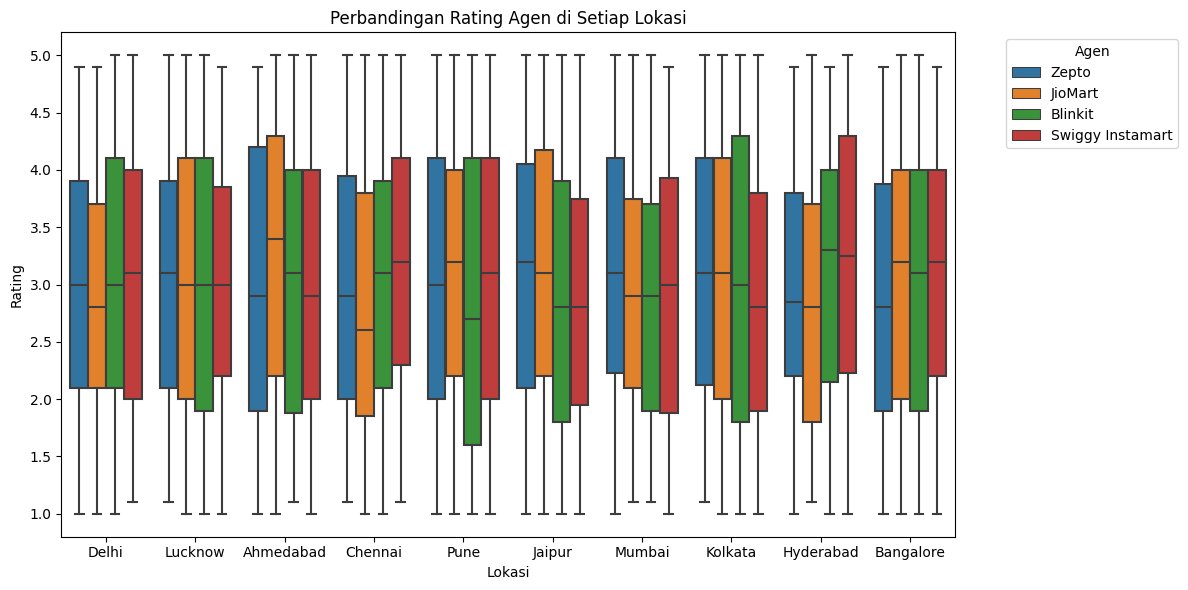

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Rating', hue='Agent Name', data=df)
plt.title('Perbandingan Rating Agen di Setiap Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Rating')
plt.legend(title='Agen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi di atas, didapatkan bahwa:
- Setiap lokasi memiliki persebaran rating yang relatif sama, yakni rentang 1-5
- Hampir semua agen di setiap lokasi memiliki persebaran rating yang seimbang (ga ada yang terlalu mendominasi).

Hal ini tentunya sesuai dengan hasil uji annova yang mengatakan tidak terdapat perbedaan signifikan pada rating berdasarkan lokasi.

Rekomendasi Bisnis:

- Optimasi Agen dengan Performa Baik
    - Agen seperti Swiggy Instamart yang memiliki rating tinggi, walaupun jumlah pengiriman rendah, bisa dijadikan sebagai acuan kualitas terhadap agen" lain.
    - Pertimbangkan untuk meningkatkan volume tugas mereka atau menjadikan mereka role model dalam pelatihan agen lain.
- Mengevaluasi Agen Berkinerja Buruk
    - Contohnya adalah Jio Mart yang menunjukkan kinerja yang buruk dari segi ratingm sehingga perlu dilakukan:
        - Evaluasi operasional dan layanan pelanggan,
        - Melakukan training atau pendekatan khusus terhadap SOP pengiriman mereka.
- Fokus pada Proses Internal, Bukan Jenis Order
    - Hal ini karena Order Type tidak memengaruhi rating, strategi peningkatan layanan sebaiknya difokuskan pada kualitas eksekusi pengiriman, bukan jenis pesanan. 
- Melihat lebih dalam terkait lokasi tertentu.
    - Walaupun Hyderabad punya waktu pengiriman paling lama, karena tidak signifikan secara statistik, perlu dilakukan audit logistik untuk mengetahui apakah ada hambatan infrastruktur, lalu lintas, atau manajemen rute.
-  Meningkatkan Customer Experience di Luar Delivery Time
    - Karena delivery time tidak berkorelasi kuat dengan rating layanan, penting untuk meningkatkan faktor lain seperti:
        - Agen menjawa atau melakukan interaksi dengan sopan dan baik,
        - menjaga Kualitas produk,
        - meningkatkan akurasi pengiriman,
        - sering mengupdate Ketersediaan barang.
- Gunakan Agen Efisien di Lokasi Strategis
    - Agen dengan rating tinggi dapat dialokasikan ke lokasi dengan waktu pengantaran tinggi untuk menstabilkan kepuasan pelanggan.
    - Kemudian bisa juga kita meningkatkan biaya tambahan apabila ingin menggunakan layanan agen yang paling cepat dan rating paling bagus agar dapat meningkatkan profit.

# v. Feature Engineering

In [24]:
# Mendefinisikan data sebagai check point after EDA
Data = Dataset.copy()
Data.head()

,Agent Name,Rating,Review Text,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job yard.,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school way issue grow action figure one.,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen lose hour hour.,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyond Democrat beautiful very.,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone effect fact hospital dream party.,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect


## 1. Feature Creation

### Discretization

In [25]:
# Mengubah nama kolom
Data.rename(columns={"Rating":"Agent Rating", "Delivery Time (min)":"Delivery Time"}, inplace=True)

Di sini saya mengubah nama kolom agar dapat lebih mudah direpresentasikan. Hal ini karena kolom delivery time ada tambahan (min), mnrut saya ini akan menggangu efisiensi dari penulisan atau pemanggilan kolom

In [26]:
Data.head()

,Agent Name,Agent Rating,Review Text,Delivery Time,Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job yard.,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school way issue grow action figure one.,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen lose hour hour.,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyond Democrat beautiful very.,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone effect fact hospital dream party.,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect


### Cardinality

In [27]:
# kolom numerik
kolom_numerik = list(Data.select_dtypes(exclude='object'))

# kolom kategorik
kolom_kategorik = list(Data.select_dtypes(include='object'))

# Cek kardinalitas
list_item = []
for col in kolom_kategorik:
    list_item.append([col, Data[col].nunique(),Data[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=list_item)

nama kolom  jumlah nilai unique  \
0              Agent Name                    4   
1             Review Text                 5000   
2                Location                   10   
3              Order Type                    5   
4  Customer Feedback Type                    3   
5             Price Range                    3   
6        Discount Applied                    2   
7    Product Availability                    2   
8          Order Accuracy                    2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

Berdasarkan pengecekan kardinalitas, ditemukan bahwa kolom review merupakan kolom dengan data unik terbanyak. Ini membuat saya mempertimbangkan untukk melakukan drop kolom review, karena kolom review membutuhkan teknik khusus untuk pengkategoriannya yang akan dibahas di fase 2(menggunakan NLTK). Kemudian alasan lainnya adalah khawatir akan mempengaruhi kerja model.

## Split Fitur dengan Target

In [28]:
# Split data feature dengan target
X = Data.drop(columns='Agent Rating')
y = Data['Agent Rating']

In [29]:
# splitting training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (4000, 11)
Test Size (1000, 11)


## 2. Feature Transformation

### Missing Value

In [30]:
# Cek Missing Value
X_train.isna().sum()

Agent Name                 0
Review Text                0
Delivery Time              0
Location                   0
Order Type                 0
Customer Feedback Type     0
Price Range                0
Discount Applied           0
Product Availability       0
Customer Service Rating    0
Order Accuracy             0
dtype: int64

Dari sini bisa dilihat bahwa data memiliki non missing value (tidak ada nilai yang kosong).

### Outlier

In [31]:
# split kolom numerik dengan kategorik
kolom_numerik = list(X.select_dtypes(exclude='object'))
kolom_kategorik = (list(X.select_dtypes(include='object')))
# Cek Outlier berdasarkan distribusi datanya:
# Cek distribusi
listItem= []

for col in kolom_numerik:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal','skewed')])


skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,Delivery Time,0.0,normal
1,Customer Service Rating,-0.0,normal


Berdasarkan hasil pengecekan skewness, ditemukan bahwa datanya memiliki nilai skewness 0 atau sangat mendekati nol yang dimana bisa dikatakan bahwa data terdistribusi normal. Ini sesuai juga dari hasil summary of statistic description dan visualiasasi box plot yang menyatakan bahwa data terdistribusi normal.

In [32]:
# lihat batas atas dan batas bawah serta persentase outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]

  # cek batas atas dan batas bawahnya
  # untuk data skewed
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  # untuk data berdistribusi normal
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()

  # memasukkan ke list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Delivery Time,79.35,-9.53,0.0
1,Customer Service Rating,7.22,-1.25,0.0


Berdasarkan hasil data pengecekan outlier juga dapat dilihat bahwa persentasi outlier sudah masuk ke dalam kategori 0% (hampir tidak ada outlier). Meskipun dapat dilihat bahwa lower_boundarynya adalah negatif, ini bisa dikatakan bahwa data tersebar sebenarnya berada di sekitaran batas atas data, tpi tidak besar sehingga masih tetap terdapat outlier namun tidak sampai 0.1 persen (didukung juga dari hasil skewnessnya yang terdapat nilai -0.0).

In [33]:
Data.head()

,Agent Name,Agent Rating,Review Text,Delivery Time,Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job yard.,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school way issue grow action figure one.,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen lose hour hour.,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyond Democrat beautiful very.,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone effect fact hospital dream party.,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect


## 3. Feature Selection

In [34]:
# Uji korelasi fitur kategorik nominal
anova_results = []

for col in kolom_kategorik:
    groups = [group['Rating'].values for name, group in df.groupby(col)]

    try:
        f_val, p_val = stats.f_oneway(*groups)
    except:
        f_val, p_val = None, None

    # Cek apakah hasilnya valid (bukan NaN)
    if pd.notna(f_val) and pd.notna(p_val) and f_val != 0:
        interpretation = 'ada korelasi'
    else:
        interpretation = 'tidak ada korelasi'

    anova_results.append({'Kolom': col, 'F-Stat': f_val, 'P-Value': p_val, 'Kesimpulan': interpretation})

# Tampilkan hasil
pd.DataFrame(anova_results)

c:\Users\farha\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


,Kolom,F-Stat,P-Value,Kesimpulan
0,Agent Name,0.240539,0.868103,ada korelasi
1,Review Text,NaN,NaN,tidak ada korelasi
2,Location,0.192352,0.995031,ada korelasi
3,Order Type,0.789425,0.531850,ada korelasi
4,Customer Feedback Type,3.597314,0.027468,ada korelasi
5,Price Range,3.481539,0.030835,ada korelasi
6,Discount Applied,1.132447,0.287305,ada korelasi
7,Product Availability,0.130941,0.717474,ada korelasi
8,Order Accuracy,0.001192,0.972459,ada korelasi


Di sini saya menggunakan annova sebagai metode untuk melakukan uji korelasi. Hal ini karena annova cocok untuk menguji korelasi antara data kategorik dengan data numerik. Berdasarkan hasil uji korelasi, ditemukan bahwa hanya hanya kolom review text yang tidak memiliki korelasi, sehingga fitur ini nantinya tidak akan digunakan untuk melakukan prediksi pada model. Notes untuk data review kenapa dia nan karena dia perlu dilakukan handling lebih lanjut seperti menjadikannya sentimen, tpi untuk saat ini hal tersebut menjadi sebuah batasan dalam project ini karena materi itu akan dibahas di fase berikutnya. Disclaimer bahwa pada case saat ini saya tidak memfokuskan melihat apakah hubungan yang ada terjadi secara kebetulan atau tidak (p-value). Hal ini karena apabila saya memfokuskan terhadap p-value juga, maka hanya sedikit fitur yang memiliki korelasi. Ini mungkin bisa disebabkan oleh fitur yang kurang mendukung atau rendahnya nilai f-statistik (hubungannya terlalu kecil sehingga diragukan itu kebetulan atau bukan).

In [35]:
# feature selection di numerik

# inisial tempat penyimpanan hasil
p_values = []
interpretasi = []
cols = []
corr_coef_list = []

for col in kolom_numerik:
    corr_coef, p_value = pearsonr(X_train[col], y_train)
    p_values.append(p_value)
    cols.append(col)
    corr_coef_list.append(corr_coef)

    if corr_coef != 0:
        interpretasi.append('ada korelasi')
    else:
        interpretasi.append('ga ada korelasi')

pd.DataFrame({
    'nama kolom': cols,
    'p_value': p_values,
    'corr_coef': corr_coef_list,
    'hasil': interpretasi
})

,nama kolom,p_value,corr_coef,hasil
0,Delivery Time,0.938178,0.001227,ada korelasi
1,Customer Service Rating,0.489169,0.010939,ada korelasi


Di sini saya ingin melihat hubungan antara fitur (numerik) dengan target(numerik) yang datanya terdistribusi normal. Berdasarkan hasil koefisien correlation ditemukan bahwa semua fitur memiliki korelasi dengan target. Disclaimer: Di sini saya berfokus melihat coefisien skornya karena tanpa memperhatikan apakah dia terjadi secara kebetulan atau tidak. 

In [36]:
# drop fitur yang tidak digunakan
X_train.drop(columns='Review Text', inplace=True)
X_test.drop(columns='Review Text', inplace=True)

### Split Kolom

In [37]:
# kolom numerik
kolom_numerik = list(X_train.select_dtypes(exclude='object'))

# kolom kategorik
kolom_kategorik = (list(X_train.select_dtypes(include='object')))

In [38]:
kolom_kategorik

['Agent Name',
 'Location',
 'Order Type',
 'Customer Feedback Type',
 'Price Range',
 'Discount Applied',
 'Product Availability',
 'Order Accuracy']

In [39]:
# Melakukan Scaling dan Encoding

# Scaling
scaler = StandardScaler()
# Encoding
encoder = OneHotEncoder(handle_unknown='error')

Scaling:
- Saya melakukan scaling data dengan menggunakan metode standarscaler. Metode ini cocok untuk data yang terdistribusi normal. Data yang saat ini sedang saya lakukan handling adalah data yang sudah terdistribusi normal, sehingga menurut saya ini merupakan metode yang cocok dengan data yang saya punya.

Encoding:
- Saya melakukan encoding data dengan menggunakan metode One Hot Encoder. Metode ini cocok untuk tipe data katgorikal yang nominal. Saat ini data fitur kategorikal yang saya punya bertipe nominal.

In [40]:
# Buat pipeline

num_pipe = Pipeline([('scaling', scaler)])

cat_pipe = Pipeline([('encoding', encoder)])

preprocessing = ColumnTransformer([('numerical', num_pipe, kolom_numerik),
                                   ('categorical', cat_pipe, kolom_kategorik)])

# vi. Model Definition

## 1. KNN

In [41]:
# Mendefinisikan Model dengan baseline
knn = KNeighborsRegressor()

# Mendefinisikan pipeline
knn_pipe = Pipeline([('fe', preprocessing), ('knn', knn)])

## 2. SVR

In [42]:
# Mendefinisikan Model dengan baseline
svr = SVR()

# Mendefinisikan pipeline
svr_pipe = Pipeline([('fe', preprocessing), ('svr', svr)])

## 3. Decision Tree

In [43]:
# Mendefinisikan Model dengan baseline
dec_tree = DecisionTreeRegressor(random_state=12)

# Mendefinisikan pipeline
dec_tree_pipe = Pipeline([('fe', preprocessing), ('dec_tree', dec_tree)])

## 4. Random Forest 

In [44]:
# Mendefinisikan Model dengan baseline
rf = RandomForestRegressor(random_state=12)

# Mendefinisikan pipeline
rf_pipe = Pipeline([('fe', preprocessing), ('rf', rf)])

## 5. Boosting

In [45]:
# Mendefinisikan Model dengan baseline
xgboost = XGBRegressor()

# Mendefinisikan pipeline
xgboost_pipe = Pipeline([('fe', preprocessing), ('xgboost', xgboost)])

# vii. Model Training & Predicting

## Training

### 1. Model Training KNN

In [46]:
# Training Model
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Delivery Time',
                                                   'Customer Service Rating']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Agent Name', 'Location',
                                                   'Order Type',
                                                   'Customer Feedback Type',
                                                   'Price Range',
                                                   'Discount Applied',
                                                   'Product Availability',
                                                   'Order Accuracy'])])),
                ('knn', KNeighborsRegressor())])

### 2. Model Training SVM

In [47]:
# Training Model
svr_pipe.fit(X_train,y_train)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Delivery Time',
                                                   'Customer Service Rating']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Agent Name', 'Location',
                                                   'Order Type',
                                                   'Customer Feedback Type',
                                                   'Price Range',
                                                   'Discount Applied',
                                                   'Product Availability',
                                                   'Order Accuracy'])])),
                ('svr', SVR())])

### 3. Model Training Decision Tree

In [48]:
# Training Model
dec_tree_pipe.fit(X_train,y_train)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Delivery Time',
                                                   'Customer Service Rating']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Agent Name', 'Location',
                                                   'Order Type',
                                                   'Customer Feedback Type',
                                                   'Price Range',
                                                   'Discount Applied',
                                                   'Product Availability',
                                                   'Order Accuracy'])])),
                ('dec_tree', DecisionTreeRegressor(random_state=12))])

### 4. Model Training Random Forest 

In [49]:
# Training Model
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Delivery Time',
                                                   'Customer Service Rating']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Agent Name', 'Location',
                                                   'Order Type',
                                                   'Customer Feedback Type',
                                                   'Price Range',
                                                   'Discount Applied',
                                                   'Product Availability',
                                                   'Order Accuracy'])])),
                ('rf', RandomForestRegressor(random_state=12))])

### 5. Model Training Boosting

In [50]:
# Training Model
xgboost_pipe.fit(X_train,y_train)

Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Delivery Time',
                                                   'Customer Service Rating']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Agent Name', 'Location',
                                                   'Order Type',
                                                   'Customer Feedback Type',
                                                   'Price Range',
                                                   'Discount Applied',
                                                   'Product Availability',
                                                   'Order Accuracy'])]))...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

## Predicting

### 1. Model predicting KNN

In [51]:
# Training Model
y_pred_knn_train = knn_pipe.predict(X_train)

# Testing Model
y_pred_knn_test = knn_pipe.predict(X_test)

### 2. Model predicting SVM

In [52]:
# Training Model
y_pred_svr_train = svr_pipe.predict(X_train)

# Testing Model
y_pred_svr_test = svr_pipe.predict(X_test)

### 3. Model predicting Decision Tree

In [53]:
# Training Model
y_pred_dec_tree_train = dec_tree_pipe.predict(X_train)

# Testing Model
y_pred_dec_tree_test = dec_tree_pipe.predict(X_test)

### 4. Model predicting Random Forest 

In [54]:
# Training Model
y_pred_rf_train = rf_pipe.predict(X_train)

# Testing Model
y_pred_rf_test = rf_pipe.predict(X_test)

### 5. Model predicting Boosting

In [55]:
# Training Model
y_pred_xgbosst_train = xgboost_pipe.predict(X_train)

# Test Model
y_pred_xgbosst_test = xgboost_pipe.predict(X_test)

# viii. Model Evaluation

Pada model evaluasi ini, saya menggunakan matriks:
- Mean Absolut Error (MAE)
    - Lebih mudah diinterpretasikan masih sama dengan satuan asli
    - cocok untuk data yang dimana kita ingin menyeimbangkan semua error secara adil, tanpa membiarkan outlier mendominasi.
- Root Mean Squared Error (RMSE)
    - Karena ini cocok pada kasus yang dimana kesalahan se kecil apapun penting.
    - Metode ini lebih mudah diinterpretasikan dan dijelaskan dibanding MSE karena dia hasilnya dikuadratkan, jadi satuannya tidak sama lagi dengan satuan asli.  
- R2
    - Skor R² menunjukkan seberapa baik variabel prediktor menjelaskan variasi dalam variabel respon.
    - Menggunakan skala yang memudahkan perbandingan antar model.
    - cocok untuk dikombinasikan bersama MAE dan RMSE (karena tidak menunjukkan besarnya kesalahan prediksi)

In [56]:
# List model dan prediksi
model_names = ['KNN', 'SVR', 'Decision Tree', 'Random Forest', 'XGBoost']
train_preds = [y_pred_knn_train, y_pred_svr_train, y_pred_dec_tree_train, y_pred_rf_train, y_pred_xgbosst_train]
test_preds = [y_pred_knn_test, y_pred_svr_test, y_pred_dec_tree_test, y_pred_rf_test, y_pred_xgbosst_test]

# List untuk menyimpan hasil
eval_results = []

for name, y_train_pred, y_test_pred in zip(model_names, train_preds, test_preds):
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    
    eval_results.append({
        'Model': name,
        'MAE Train': round(mae_train, 4),
        'RMSE Train': round(rmse_train, 4),
        'R² Train': round(r2_train, 4),
        'MAE Test': round(mae_test, 4),
        'RMSE Test': round(rmse_test, 4),
        'R² Test': round(r2_test, 4),
    })

# Buat DataFrame hasil evaluasi
df_eval = pd.DataFrame(eval_results)
df_eval

,Model,MAE Train,RMSE Train,R² Train,MAE Test,RMSE Test,R² Test
0,KNN,0.8712,1.0381,0.1857,1.0536,1.2514,-0.1681
1,SVR,0.8161,1.0129,0.2247,1.0341,1.2130,-0.0976
2,Decision Tree,0.0011,0.0291,0.9994,1.3603,1.6471,-1.0238
3,Random Forest,0.3777,0.4456,0.8500,1.0123,1.1848,-0.0472
4,XGBoost,0.4105,0.5106,0.8030,1.0958,1.3059,-0.2723


Berdasarkan hasil dari model yang telah dilatih dan diuji, didapatkan hasil sebagai berikut:
- KNN
    - Train
        - MAE = 0.87  ini berarti prediksi rata-rata meleset +-0.87 satuan dari nilai sebenarnya.
        - RMSE = 1.04 ini berarti ada beberapa prediksi yang error besar.
        - R2 = 0.18 ini berarti model hanya mampu menjelaskan kurang dari 20% variasi data
    - Test
        - MAE naik ke 1.05 dan RMSE ke 1.25 ini berarti penurunan performa.
        - R2 = -0.17 ini berarti model sangat buruk
    - Kesimpulannya:
        -  Model bisa dikatakan underfitt hal ini karena nilai test lebih bagus daripada nilai data (model masih kurang belajar)
- SVR
    - Train
        - MAE = 0.82 dan RMSE = 1.01 bisa dikatakan bahwa hasilrediksi sedikit lebih baik dari KNN.
        - R2 = 0.22 bisa dikatakan bahwa model masih lemah dalam menjelaskan variasi data.
    - Test
        - MAE = 1.03, RMSE = 1.21, dan R2 = -0.097 ini berarti performanya menjadi lebih buruk di test set.
    - Kesimpulan:
        - Model masih underfitting.
- Decision Tree
    - Train
        - MAE = 0.0011 dan RMSE = 0.0291 ini berarti hampir model sempurna, errornya sangat kecil.
        - R2 = 0.999 ini berarti model menjelaskan hampir hampir keseluruhan variasi di data.
    - Test
        - MAE = 1.36 dan RMSE = 1.64 ini menandakan bahwa hasil prediksi sangat buruk.
        - R2 = -1.02 model sangat buruk. 
    - Kesimpulan:
        - Model sangat overfitting.
- Random Forest
    - Train
        - MAE = 0.38 dan RMSE = 0.45 dapat dikatakan model cukup bagus dan stabil.
        - R2 = 0.85 cukup menjelaskan variasi data.
    - Test
        - MAE = 1.01 dan RMSE = 1.18 hasil prediksi menurun, tapi masih paling baik di antara semua.
        - R2 = -0.047 nilainya masih negatif, tapi paling mendekati 0 dibandingkan yangn lainnya.
    - Kesimpulan:
        - Ini merupakan model terbaik sejauh ini.
- XGBoost
    - Train
        - MAE = 0.41, RMSE = 0.51 ini menandakan model hampir sebaik Random Forest.
        - R2 = 0.80 model mampu menjelaskan 80% variasi data.
    - Test
        - MAE = 1.10 dan RMSE = 1.31 terdapat penurunan performa dari training
        - R2 = -0.27 modelnya gagal menjelaskan variasi data.
    - Kesimpulan: 
        - Performa tidak sebaik Random Forest, menunjukkan overfitting sedang.

**Kesimpulan (Pemilihan model terbaik):**

Berdasarkan evaluasi model yang telah dilakukan, ditemukan bahwa secara keseluruhan model memang masih kurang baik, namun ditemukan random forest yang ternyata sejauh ini merupakan model terbaik dari semua model yang ada. Hal ini karena train test errornya paling rendah, nilai R2 sedikit mendekati nol, ini berarti model sedikit lebih informatif dibandingkan yang lainnya.

In [57]:
# Evaluasi fungsi
def evaluate_model(y_train, y_pred_train, y_test, y_pred_test, model_name):
    print(f'Model: {model_name}')
    
    # Train 
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = root_mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Test
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = root_mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'Train - MAE: {mae_train:.4f} | MSE: {mse_train:.4f} | RMSE: {rmse_train:.4f} | R2: {r2_train:.4f}')
    print(f'Test  - MAE: {mae_test:.4f} | MSE: {mse_test:.4f} | RMSE: {rmse_test:.4f} | R2: {r2_test:.4f}')

## 1.  Visualisasi Model Evaluation KNN

In [58]:
# Evaluasi Model
evaluate_model(y_train, y_pred_knn_train, y_test, y_pred_knn_test, 'KNN')

Model: KNN
Train - MAE: 0.8712 | MSE: 1.0776 | RMSE: 1.0381 | R2: 0.1857
Test  - MAE: 1.0536 | MSE: 1.5659 | RMSE: 1.2514 | R2: -0.1681


## 2. Model Evaluation SVM

In [59]:
# Evaluasi Model
evaluate_model(y_train, y_pred_svr_train, y_test, y_pred_svr_test, 'SVR')

Model: SVR
Train - MAE: 0.8161 | MSE: 1.0261 | RMSE: 1.0129 | R2: 0.2247
Test  - MAE: 1.0341 | MSE: 1.4713 | RMSE: 1.2130 | R2: -0.0976


## 3. Model Evaluation Decision Tree

In [60]:
# Evaluasi Model
evaluate_model(y_train, y_pred_dec_tree_train, y_test, y_pred_dec_tree_test, 'Decision Tree')

Model: Decision Tree
Train - MAE: 0.0011 | MSE: 0.0008 | RMSE: 0.0291 | R2: 0.9994
Test  - MAE: 1.3603 | MSE: 2.7129 | RMSE: 1.6471 | R2: -1.0238


## 4. Model Evaluation Random Forest 

In [61]:
# Evaluasi Model
evaluate_model(y_train, y_pred_rf_train, y_test, y_pred_rf_test, 'Random Forest')

Model: Random Forest
Train - MAE: 0.3777 | MSE: 0.1986 | RMSE: 0.4456 | R2: 0.8500
Test  - MAE: 1.0123 | MSE: 1.4037 | RMSE: 1.1848 | R2: -0.0472


## 5. Model Evaluation Boosting

In [62]:
# Evaluasi Model
evaluate_model(y_train, y_pred_xgbosst_train, y_test, y_pred_xgbosst_test, 'XGBoost')

Model: XGBoost
Train - MAE: 0.4105 | MSE: 0.2607 | RMSE: 0.5106 | R2: 0.8030
Test  - MAE: 1.0958 | MSE: 1.7055 | RMSE: 1.3059 | R2: -0.2723


In [63]:
# Inisialisasi KFold cross-validator (5-fold cv sebagai contoh)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# List model pipeline yang sudah kamu buat sebelumnya
pipelines = [knn_pipe, svr_pipe, dec_tree_pipe, rf_pipe, xgboost_pipe]
model_names = ['KNN', 'SVR', 'Decision Tree', 'Random Forest', 'XGBoost']

# Menyimpan hasil CV
cv_results = []

for name, model in zip(model_names, pipelines):
    scores_mae = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv)
    scores_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv))
    scores_r2 = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv)

    cv_results.append({
        'Model': name,
        'CV MAE (mean)': round(scores_mae.mean(), 4),
        'CV RMSE (mean)': round(scores_rmse.mean(), 4),
        'CV R² (mean)': round(scores_r2.mean(), 4),
        'CV R² (std)': round(scores_r2.std(), 4),  # Mengukur kestabilan
    })

# Buat DataFrame hasil evaluasi CV
df_cv_eval = pd.DataFrame(cv_results)
df_cv_eval

,Model,CV MAE (mean),CV RMSE (mean),CV R² (mean),CV R² (std)
0,KNN,1.0659,1.2627,-0.2059,0.0222
1,SVR,1.0358,1.2153,-0.1175,0.0203
2,Decision Tree,1.3629,1.6696,-1.1086,0.0471
3,Random Forest,1.0183,1.1866,-0.0653,0.0189
4,XGBoost,1.0954,1.3103,-0.2994,0.0386


Di sini saya melakukan cross validation yang dimana tujuannya untuk mengevaluasi seberapa konsisten data dan algoritma yang digunakan(khususnya pada data yang tidak terlihat sebelumnya). Berikut adalah hasil temuannya:

- Random Forest
    - Sejauh ini random forest masih menjadi model lebih baik dibanding yang lainnya
    - CV MAE & RMSE paling kecil yang dimana bisa dibilang paling akurat di rata-rata.
    - CV R2 paling mendekati nol (meskipun belum positif), berarti sedikit overfitting tapi tidak parah.
    - R2 std terkecil yang berarti sangat stabil antar fold.
    - Model ini cocok untuk baseline.

- SVR
    - Cukup stabil dan akurat, tapi CV R2 masih negatif yang dimana merupakan underfitting ringan.
    - Perlu tuning kernel dan parameter (C, gamma) lebih lanjut.
    - Model ini bisa diuji lebih lanjut setelah Random Forest.

- KNN
    - Performanya lebih buruk dari SVR dan RF.
    - R2 negatif menandakan kurang mampu menangkap pola kompleks.
    - Bisa dibilang model kurang cocok untuk data ini.

- XGBoost
    - Bisa dibilang modelnya kurang bagus (bisa karena kurangnya fitur penting seperti review teks).
    - Default parameter terlalu konservatif.
    - Perlu dilakukan tuning hyperparameter atau tambahkan fitur.

- Decision Tree
    - CV R2 sangat tidak baik, berarti overfitting ekstrim bisa dibilang karena terlalu cocok dengan data train, gagal generalisasi (hal ini merupakan risiko terbesar yang paling mungkin terjadi, karena Decsion tree akan terus melakukan pembelahan hingga sangat terperinci sehingga sangat rawan terjadi overfitting).
    - Model tidak cocok untuk data ini.

**Kesimpulan:**
Berdasarkan keseluruhan proses eksplorasi dan evaluasi model yang telah dilakukan, dapat disimpulkan bahwa secara umum performa model masih belum optimal, namun terdapat beberapa insight atau temuan penting yang bisa digunakan untuk next modeling. Model Random Forest merupakan model terbaik di antara semua yang diuji. Hal ini didukung oleh hasil cross validation error yang paling rendah, serta nilai R2 yang meskipun belum positif, namun paling mendekati nol, menunjukkan bahwa model ini sedikit lebih mampu menangkap pola dibanding model lainnya. Selain itu, nilai standar deviasi R2 yang rendah juga menunjukkan bahwa model ini konsisten antar fold. Model lain seperti SVR juga menunjukkan performa yang cukup stabil, namun masih mengalami sedikit underfitting karena model masih belum bisa menangkap pola data. Dengan tuning lanjutan, model ini berpotensi meningkatkan performanya. Di sisi lain, model seperti KNN dan XGBoost masih mempunyai kemungkinan underfitting karena nilai R2 yang negatif. Sedangakan Decision Tree dia justru sebaliknya memiliki potensi menjadi overfitting karena nilai CV R2 sangat negatif dan CV R2 std yang sangat tinggi. Oleh karena itu saya memilih model random forest yang akan dilakukan hyper parameter tunning pada next step.

**Evaluasi Kekurangan dan kelebihan model:**

KNN:
- Kelebihan:
    - Simpel dan mudah dipahami secara konsep.
    - Tidak memerlukan pelatihan model yang rumit.
- Kekurangan:
    - Performa lemah di train dan test yang dimana ini merupakan indikasi underfitting.
    - Sulit menangkap pola jika data tidak termapping dengan baik.
    - Sensitif terhadap skala fitur sehingga perlu dilakukan normalisasi.
    - Waktu prediksi bisa lama jika dataset.

SVR:
- Kelebihan:
    - Cocok untuk data kecil dan tidak terlalu noisy.
    - Lebih stabil dibanding KNN (sedikit lebih baik hasilnya di train dan test).
- Kekurangan:
    - Masih underfitting, karena R2 rendah dan error tinggi di test.
    - Kurang tangguh untuk dataset yang kompleks atau banyak noise.
    - Sulit dalam tuning hyperparameter seperti kernel dan C.

Decision Tree:
- Kelebihan:
    - Sangat akurat di data train karena mampu belajar pola dengan baik.
    - Mudah diinterpretasi, karena bisa divisualisasikan sebagai pohon keputusan.
- Kekurangan:
    - Overfitting parah, error sangat rendah di train tapi sangat buruk di test.
    - Tidak generalisasi dengan baik.
    - Sangat sensitif terhadap perubahan kecil di data (high variance).

Random Forest:
- Kelebihan:
    - Model paling stabil sejauh ini.
    - Performanya bagus di train dan paling baik di test (MAE, RMSE rendah).
    - overfitting lebih rendah dibanding Decision Tree tunggal.
    - Cocok untuk data dengan banyak fitur.
- Kekurangan:
    - Masih  overfitting.

XGBoost
- Kelebihan:
    - Salah satu algoritma boosting yang powerful.
    - Cepat dan efisien dalam proses training.
    - Cukup akurat di data training (mirip Random Forest).
- Kekurangan:
    - Performa turun di test set yang membuatnya menjadi overfitting sedang.
    - Hasil akhir masih kalah dari Random Forest.

## Hyper Parameter Tunnning

Pada hyper parameter tunning ini, saya memilih beberapa model untuk dilakukan hyper parameter tunning yakni randomforest, xgboost, dan svr. Alasannya adalah ketika saya melakukan evaluasi model, ditemukan bahwa random forest dan xgboost 

In [64]:
rf_pipe = Pipeline([
    ('fe', preprocessing),
    ('rf', RandomForestRegressor(random_state=12))
])

# Parameter grid untuk Random Forest (akses lewat 'model__' prefix)
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 15, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    rf_pipe,
    param_distributions=rf_param_grid,
    n_iter=30,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=12,
    verbose=2,
    n_jobs=-1
)

# Jalankan tuning
rf_search.fit(X_train, y_train)

# Model terbaik

print("Best models:",rf_search.best_estimator_)
print("Best parameters:", rf_search.best_params_)
print("Best score (neg MAE):", rf_search.best_score_)

best_rf_model = rf_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best models: Pipeline(steps=[('fe',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['Delivery Time',
                                                   'Customer Service Rating']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Agent Name', 'Location',
                                                   'Order Type',
                                                   'Customer Feedback Type',
                                                   'Price Range',
         

In [65]:

grid_rf = GridSearchCV(rf_pipe, rf_param_grid, cv=5).fit(X_train, y_train)

print(grid_rf.best_params_)

print(-1 * grid_rf.best_score_)

y_pred_grid = grid_rf.best_estimator_.predict(X_test)

{'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}
0.02018818765732653


In [72]:
best_model_grid = grid_rf.best_estimator_

In [66]:
def evaluate_trained_model(model, X_train, y_train, X_test, y_test, label='Model'):
    """
    Melakukan prediksi dan evaluasi untuk model terlatih pada data train dan test.
    Menampilkan MAE, RMSE, dan R² score.
    """
    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluasi
    def evaluate(y_true, y_pred, data_label):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        print(f'{label} ({data_label}) - MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}')

    evaluate(y_train, y_train_pred, 'Train')
    evaluate(y_test, y_test_pred, 'Test')

In [67]:
evaluate_trained_model(best_rf_model, X_train, y_train, X_test, y_test, label='Random Forest')
evaluate_trained_model(grid_rf.best_estimator_, X_train, y_train, X_test, y_test, label='Random Forest (Grid Search)')

Random Forest (Train) - MAE: 0.8783 | RMSE: 1.0203 | R²: 0.2133
Random Forest (Test) - MAE: 1.0039 | RMSE: 1.1640 | R²: -0.0108
Random Forest (Grid Search) (Train) - MAE: 0.8827 | RMSE: 1.0252 | R²: 0.2058
Random Forest (Grid Search) (Test) - MAE: 1.0006 | RMSE: 1.1594 | R²: -0.0028


Temuan:
- Random Forest (Randomized & Grid):
    - Performa di training set cukup tinggi (R2 > 0.20), menunjukkan model bisa menangkap pola.
    - Performa di test set buruk (R2 negatif), yang mengindikasikan adanya overfitting model.
    - MAE & RMSE juga meningkat cukup drastis dari train ke test.

Kesimpulan:
Berdasarkan hasil tuning dan evaluasi, saya memutuskan untuk memilih model Random Forest versi Grid Search (hasil hyperparameter tuning yang lebih mendalam). Meskipun R² pada test set masih negatif, model ini menunjukkan performa paling stabil, tidak jauh berbeda antara training dan testing. Dibandingkan model lain, Random Forest Grid ini menjadi pilihan terbaik sementara sebagai baseline karena mampu menangkap pola dengan cukup baik dan hasil tuning memberikan peningkatan akurasi serta kestabilan yang lebih baik.

# ix. Model Saving

In [73]:
# save model dan data yang dibutuhkan
with open('randomforest_regression_grid_best.pkl','wb')as file:
    pickle.dump(best_model_grid,file)

# x. Model Inference

Model Inference sudah dilakukan pada file P1M2_MuhammadFarhan_Hendriyanto_Inference.ipynb

# xi. Kesimpulan dan Rekomendasi

Kesimpulan: 

**Model**
Berdasarkan eksperimen dan evaluasi model yang telah dilakukan, ditemukan bahwa:

- Random Forest dengan hasil tuning melalui GridSearchCV menjadi model terbaik sejauh ini, dengan performa train MAE +-0.88 dan test MAE +-1.00, serta nilai R2 di training positif (0.21), meskipun di test set masih sedikit negatif.

- Hal ini menunjukkan bahwa model dapat menangkap pola data pada training dengan baik, namun belum sepenuhnya mampu generalisasi ke data baru.

- Model lain seperti SVR dan KNN menunjukkan tanda underfitting, sementara Decision Tree dan XGBoost menunjukkan potensi overfitting atau sensitivitas tinggi terhadap struktur data.

- Secara umum, semua model masih belum ideal, tapi Random Forest cukup stabil dan layak dijadikan baseline.

Hal ini kemungkinan disebabkan oleh fitur"nya (datanya) yang kurang bagus, ini dapat dilihat salah satunya dari uji korelasi. Saat melakukan uji korelasi, sangat sedikit data yang memiliki path koef < 0.05 sehingga saya memutuskan untuk memfokuskan untuk melihat koefisen korelasinya saja (dapat dikatakan bahwa datanya bisa saja terjadi secara kebetulan atau tidak). Hal ini yang pada akhirnya membuat model banyak yang mengalami overfit dan underfit. Bahkan sampai akhir model juga masih memiliki nilai R2 yang negatif. ini menandakan bahwa data masih kurang baik bisa dipelajari oleh model. Kemudian dalam melakukan modeling, terdapat keterbatasan waktu yang membuat fleksibilitas pada saat melakukan eksperimen menjadi terbatas juga.


**Analisis**
Berdasarkan hasil analisis ditemukan bahwa: 
- Kualitas Layanan dan Dampaknya ke Pelanggan:
Dari data yang dianalisis, terlihat bahwa rating pelanggan cenderung rendah jika terjadi masalah pada aspek-aspek seperti waktu pengiriman yang lama, ketersediaan produk (out of stock), atau kesalahan dalam akurasi pesanan. Ini menunjukkan bahwa pengalaman pelanggan sangat dipengaruhi oleh kecepatan, keakuratan, dan ketersediaan barang. Jika salah satu dari ini terganggu, maka kepuasan mereka pun ikut menurun.
- Evaluasi Agen dengan Performa Kurang Baik:
    - Berdasarkan analisis, beberapa agen pengiriman terlihat memiliki tren negatif dalam metrik-metrik penting seperti:
        - Rata-rata rating rendah 
        - Sering terjadi order yang out of stock
        - Tingkat akurasi pesanan yang buruk. Agen-agen seperti ini bisa menjadi prioritas evaluasi untuk ditingkatkan performanya, atau bahkan diberi pelatihan ulang atau diganti jika perlu.

**Rekomendasi** 

**Model**
Mungkin bisa dicoba untuk melakukan feature creation yang lebih proper agar model dapat belajar dari informasi yang lebih banyak dan lebih baik lagi, sehingga dapat meminimalisir terjadinya overfit ataupun underfit. Kemudian mungkin bisa dicoba untuk melakukan eksplorasi pada data teks review, karena pada saat ini saya juga memiliki keterbatasan dalam melakukan eksplorasi kolom tersebut, karena mungkin saja kolom itu nantinya dapat memberikan insight yang berbeda daripada yang sudah dilakukan sebelumnya.

**Bisnis**
Rekomendasi Bisnis Strategi Peningkatan Layanan:
- Insight dari data ini bisa digunakan perusahaan untuk menyusun strategi yang lebih tepat, misalnya:
    - Menambah jumlah kurir atau memperbaiki sistem logistik di area dengan waktu pengiriman paling lama
    - Meningkatkan akurasi pemrosesan pesanan dengan sistem verifikasi tambahan atau pelatihan staf
    - Memberikan promo atau diskon sebagai kompensasi untuk pelanggan yang pernah menerima layanan buruk
    - Mengoptimalkan stok produk untuk menghindari status “out of stock” terutama untuk barang-barang esensial
